### Basic imports

In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

### Accessing data

In [2]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')

In [3]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


#target label

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

basically 1->seizure activity rest->non-seizure activities

In [7]:
#converting into binary problem
bin_map = {1:1,2:0,3:0,4:0,5:0}
df['y'] = df['y'].replace(bin_map)
df['y'].value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

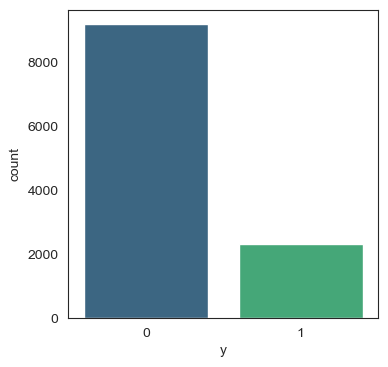

In [8]:
#after mapping
plt.figure(figsize=(4,4))
sns.countplot(x='y',data=df,palette='viridis')

In [9]:
#checking for missing data
df.isnull().sum().sort_values(ascending=False)
#no missing data in this case

Unnamed    0
X113       0
X115       0
X116       0
X117       0
          ..
X61        0
X62        0
X63        0
X64        0
y          0
Length: 180, dtype: int64

In [10]:
#duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.drop('Unnamed',axis=1,inplace=True)

### Splitting data

In [14]:
X = df.drop('y',axis=1)
y = df['y']

### Oversampling data

In [17]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
rand = RandomOverSampler()
print("Before:", Counter(y))
X_rand, y_rand = rand.fit_resample(X, y)
print("After:", Counter(y_rand))

Before: Counter({0: 9200, 1: 2300})
After: Counter({0: 9200, 1: 9200})


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [20]:
#oversampled data
X_train_rand,X_test_rand,y_train_rand,y_test_rand = train_test_split(X_rand,y_rand,test_size=0.3)

### Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)

In [22]:
X_train_rand = st_sclr.fit_transform(X_train_rand)
X_test_rand = st_sclr.transform(X_test_rand)

# Base Models - Dtree,RFC,SVM,Logistic

## Decision Tree

In [24]:
#for orignal data
from sklearn.tree import DecisionTreeClassifier
dtree_1 = DecisionTreeClassifier()
dtree_1.fit(X_train,y_train)
pred_dtree_1 = dtree_1.predict(X_test)
print("Decision Tree with Orignal Data: ")
print(classification_report(y_test,pred_dtree_1))

Decision Tree with Orignal Data: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2756
           1       0.87      0.82      0.84       694

    accuracy                           0.94      3450
   macro avg       0.91      0.89      0.90      3450
weighted avg       0.94      0.94      0.94      3450



In [25]:
#oversampled data
dtree_2 = DecisionTreeClassifier()
dtree_2.fit(X_train_rand,y_train_rand)
pred_dtree_2 = dtree_2.predict(X_test_rand)
print("Decision Tree with Oversampled Data: ")
print(classification_report(y_test_rand,pred_dtree_2))

Decision Tree with Oversampled Data: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2782
           1       0.95      0.99      0.97      2738

    accuracy                           0.97      5520
   macro avg       0.97      0.97      0.97      5520
weighted avg       0.97      0.97      0.97      5520



#### Decision Tree with oversampled data performs better on identifying both classes

## Random Forest

In [26]:
#rfc with orignal data
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train,y_train)
pred_rfc_1 = rfc_1.predict(X_test)
print("Random Forest with orignal data: ")
print(classification_report(y_test,pred_rfc_1))

Random Forest with orignal data: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2756
           1       0.95      0.92      0.94       694

    accuracy                           0.97      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.97      0.97      0.97      3450



In [29]:
#rfc with oversampled data
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_rand,y_train_rand)
pred_rfc_2 = rfc_2.predict(X_test_rand)
print("Random Forest with oversampled data: ")
print(classification_report(y_test_rand,pred_rfc_2))

Random Forest with oversampled data: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2782
           1       0.98      1.00      0.99      2738

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



#### RFC achieved 99% accuracy with oversampled data

## SVM

In [30]:
#orignal data
from sklearn.svm import SVC
svm_1 = SVC()
svm_1.fit(X_train,y_train)
pred_svm_1 = svm_1.predict(X_test)
print("SVM with orignal data: ")
print(classification_report(y_test,pred_svm_1))

SVM with orignal data: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2756
           1       0.96      0.88      0.92       694

    accuracy                           0.97      3450
   macro avg       0.96      0.93      0.95      3450
weighted avg       0.97      0.97      0.97      3450



In [31]:
#oversampled data
svm_2 = SVC()
svm_2.fit(X_train_rand,y_train_rand)
pred_svm_2 = svm_2.predict(X_test_rand)
print("SVM with oversampled data: ")
print(classification_report(y_test_rand,pred_svm_2))

SVM with oversampled data: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2782
           1       0.98      0.97      0.98      2738

    accuracy                           0.98      5520
   macro avg       0.98      0.98      0.98      5520
weighted avg       0.98      0.98      0.98      5520



### Logistic Regression

In [33]:
#orignal data
from sklearn.linear_model import LogisticRegression
lg_mdoel_1 = LogisticRegression()
lg_mdoel_1.fit(X_train,y_train)
pred_lg_1 = lg_mdoel_1.predict(X_test)
print("Logistic Regression with orignal data: ")
print(classification_report(y_test,pred_lg_1))

Logistic Regression with orignal data: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2756
           1       1.00      0.10      0.18       694

    accuracy                           0.82      3450
   macro avg       0.91      0.55      0.54      3450
weighted avg       0.85      0.82      0.75      3450



In [35]:
#oversampled data
lg_mdoel_2 = LogisticRegression()
lg_mdoel_2.fit(X_train_rand,y_train_rand)
pred_lg_2 = lg_mdoel_2.predict(X_test_rand)
print("Logistic Regression with oversampled data: ")
print(classification_report(y_test_rand,pred_lg_2))

Logistic Regression with oversampled data: 
              precision    recall  f1-score   support

           0       0.61      0.77      0.68      2782
           1       0.69      0.50      0.58      2738

    accuracy                           0.64      5520
   macro avg       0.65      0.64      0.63      5520
weighted avg       0.65      0.64      0.63      5520





# Deep Learning Models

### ANN

In [51]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
X_train_rand,X_val_rand,y_train_rand,y_val_rand = train_test_split(X_train_rand,y_train_rand,test_size=0.2)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [50]:
X_train.shape

(8050, 178)

In [56]:
def create_model():
    #define model
    model = Sequential()
    #layer 1 ->178
    model.add(Dense(178,activation='relu'))
    model.add(Dropout(0.2))
    #layer 2 ->89
    model.add(Dense(89,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3 ->44
    model.add(Dense(44,activation='relu'))
    model.add(Dropout(0.2))
    #layer 4 ->22
    model.add(Dense(22,activation='relu'))
    model.add(Dropout(0.2))
    #layer 5 -> 11
    model.add(Dense(11,activation='relu'))
    model.add(Dropout(0.2))
    #layer 6 -> 6
    model.add(Dense(6,activation='relu'))
    #layer 7 ->3
    model.add(Dense(3,activation='relu'))
    #ouptut layer
    model.add(Dense(1,activation='sigmoid'))
    
    #compile model
    model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])
    
    return model

In [71]:
#ANN with orignal data
from tensorflow.keras.backend import clear_session
clear_session()
ANN_1 = create_model()

In [72]:
history_1 = ANN_1.fit(X_train,y_train,
         validation_data=(X_val,y_val),
         epochs=50,batch_size=128)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8024 - loss: 0.6962 - val_accuracy: 0.7870 - val_loss: 0.5227
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8050 - loss: 0.4879 - val_accuracy: 0.7870 - val_loss: 0.2738
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8063 - loss: 0.2871 - val_accuracy: 0.7870 - val_loss: 0.2175
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8068 - loss: 0.2149 - val_accuracy: 0.7870 - val_loss: 0.2163
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8029 - loss: 0.2017 - val_accuracy: 0.7870 - val_loss: 0.1985
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8722 - loss: 0.1835 - val_accuracy: 0.9714 - val_loss: 0.1954
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9632 - loss: 0.1721 - val_accuracy: 0.9714 - val_loss: 0.1897
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9630 - loss: 0.1640 - val_accuracy: 0.9727 - v

<Axes: >

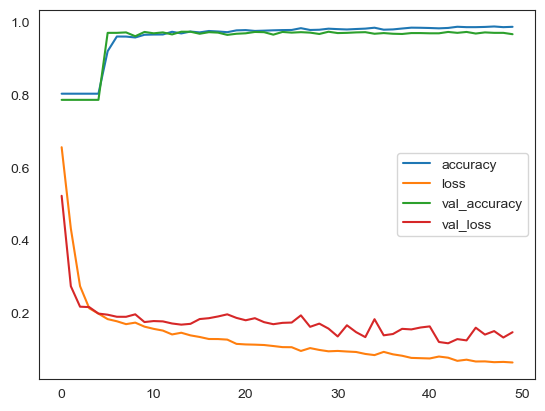

In [76]:
loss_df_1 = pd.DataFrame(history_1.history)
loss_df_1.plot()

In [61]:
pred_ANN_1 = ANN_1.predict(X_test)
pred_ANN_1 = (pred_ANN_1 > 0.5).astype(int)
print(classification_report(y_test,pred_ANN_1))

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2756
           1       0.97      0.92      0.94       694

    accuracy                           0.98      3450
   macro avg       0.97      0.96      0.96      3450
weighted avg       0.98      0.98      0.98      3450



In [ ]:
ANN_1.sav

In [77]:
#ANN with oversampled data
ANN_2 = create_model()

In [78]:
history_2 = ANN_2.fit(X_train_rand,y_train_rand,
         validation_data=(X_val_rand,y_val_rand),
         epochs=75,batch_size=128)

Epoch 1/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.6309 - loss: 0.6866 - val_accuracy: 0.9196 - val_loss: 0.5300
Epoch 2/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9169 - loss: 0.4833 - val_accuracy: 0.9674 - val_loss: 0.3566
Epoch 3/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9622 - loss: 0.3611 - val_accuracy: 0.9713 - val_loss: 0.3300
Epoch 4/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9608 - loss: 0.3348 - val_accuracy: 0.9573 - val_loss: 0.3170
Epoch 5/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9626 - loss: 0.3118 - val_accuracy: 0.9724 - val_loss: 0.2871
Epoch 6/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9733 - loss: 0.2818 - val_accuracy: 0.9732 - val_loss: 0.2795
Epoch 7/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9761 - loss: 0.2655 - val_accuracy: 0.9705 - val_loss: 0.2627
Epoch 8/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9731 - loss: 0.2560 - val_accuracy: 0.9697 - v

<Axes: >

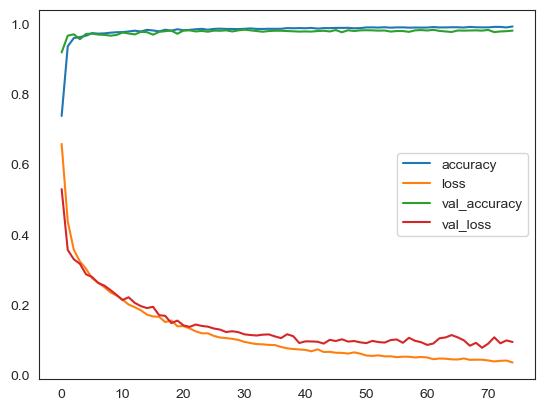

In [79]:
loss_df_2 = pd.DataFrame(history_2.history)
loss_df_2.plot()

In [65]:
pred_ANN_2 = ANN_2.predict(X_test_rand)
pred_ANN_2 = (pred_ANN_2 > 0.5).astype(int)
print(classification_report(y_test_rand,pred_ANN_2))

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2782
           1       0.98      1.00      0.99      2738

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520

